# Tutorial 6: Plotting with MatPlotLib

## PHYS 2600

We're now getting to a point where there are usually several modules that we're going to be using repeatedly through the entire Jupyter notebook - `numpy` and `pyplot` as a bare minimum.

When multiple modules are being used, if we just import them as we need them, then it's harder to read exactly what modules are needed to run our notebook.  And if we restart the kernel, we have to remember to re-run all the cells, or go and look for where our `import` statements were...

A common practice is to instead have an __import cell__ at the _very top_ of our notebook, where we gather all the import statements together - which I'll start doing now!

In [1]:
# Initialization cell; run me first!

# More Jupyter magic.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

The 'magic command' `%matplotlib` is used to instruct Jupyter how to deal with `matplotlib` plots, and to control whether and how they are shown in the cell outputs in particular.  We use the `inline`  option, which tells Jupyter to display plots "inline", i.e. as part of the output after each cell.  Correspondingly, the "global state" of `pyplot` is only kept within a cell; going to a new cell creates a new plot.

There are [other options](https://matplotlib.org/stable/users/explain/interactive.html) for more interactive plots, but in my own tests they didn't work well with CoCalc.  If you're doing this notebook on your own laptop, feel free to try other options like `%matplotlib notebook`, but I won't discuss them further here.

## T7.1 - The basics of plotting

Let's start by getting used to `matplotlib` and some of its more basic functions.  This will be a brief, guided tour - we certainly won't see everything that `matplotlib` can do!  If you're looking to customize your plots in a certain way that we didn't cover, __search the official documentation and/or the Internet at large for help!__

As before, I won't give you every single detail of how the functions below work: you are expected to use the `?` magic command or search for official documentation to figure them out.

### Part A: the basics

The first function you have to get comfortable with is the `plt.plot(x,y)` function, which takes a pair of NumPy arrays `x` and `y` and plots the points `(x,y)`.  Note that __the `x` and `y` arrays must be the same size__ for this to make sense - if you give `plt.plot` two differently-sized arrays, you will get an error!

Now, some exercises in using `plt.plot()`!  First, __plot the experimental data below__ for neutron counts `decay_N` vs. the measurement time `decay_t`.

_(Remember: by default, the global state of `pyplot` exists only for a single cell.  So you'll need three cells below to make these three plots!)_

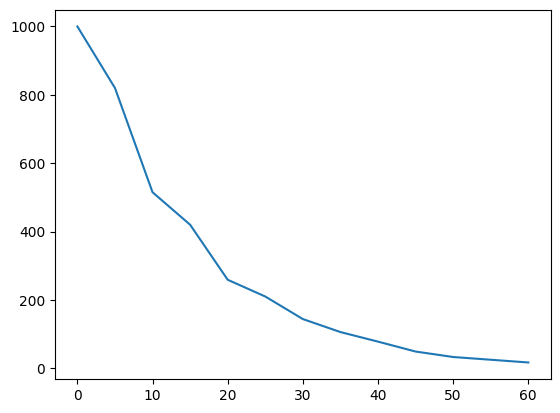

In [2]:
# Neutron decay experimental data

decay_t = np.array(
    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
)  # time in minutes
decay_N = np.array(
    [1000, 820, 515, 420, 259, 210, 144, 106, 78, 49, 33, 25, 17]
)  # number of neutrons remaining

### BEGIN SOLUTION
plt.plot(decay_t, decay_N)
### END SOLUTION

Now __plot the function $f(x) = e^x$__ over the range $-1 \leq x \leq 1$.  (Remember, to get a function of an array, you need a NumPy function - in this case, `np.exp()`.  Make your own `x` array using `np.linspace`.)

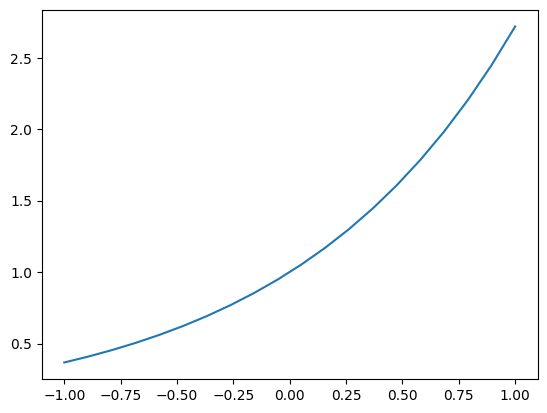

In [3]:
# Plotting e^x

### BEGIN SOLUTION
x = np.linspace(-1, 1, 20)
y = np.exp(x)
plt.plot(x, y)
### END SOLUTION

Finally, __make a single plot showing the three functions__, $f(x) = x, x^2$, and $x^3$ over the range $0 \leq x \leq 2$.  (Note that the color will automatically be chosen differently for each curve, to make them easy to tell apart.)

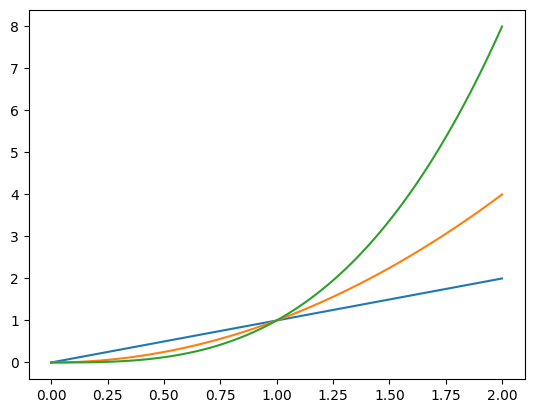

In [4]:
# Three polynomials

### BEGIN SOLUTION
x = np.linspace(0, 2, 100)
plt.plot(x, x)
plt.plot(x, x**2)
plt.plot(x, x**3)
### END SOLUTION

### Part B: options for `plt.plot`

We can use keyword arguments for `plt.plot()` to customize the way our plot looks in a number of different ways:

* `color=...` allows us to the set the color of the markers and/or line, with [many options](https://matplotlib.org/examples/color/named_colors.html).
* `marker=...` allows us to turn on plotting individual $(x,y)$ points, and choose their shape (again, [many options are available](https://matplotlib.org/api/markers_api.html)).
* `linestyle=...` allows us to choose how the line joining the points is drawn, or turn it off.  (There are [a few options](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) for this.)

There are [many more commands](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to control the thickness of the line, size of the markers, and fancier things like filling color in between curves.  But the three above are good enough for most purposes.

__Re-create the same three plots from part A__ (you can just copy/paste your code), but with the following custom options:

- The experimental data plot, but with no line, and the markers are __green triangles__.  (You can pick which way you want the triangles to face, and whatever shade of green you like.)

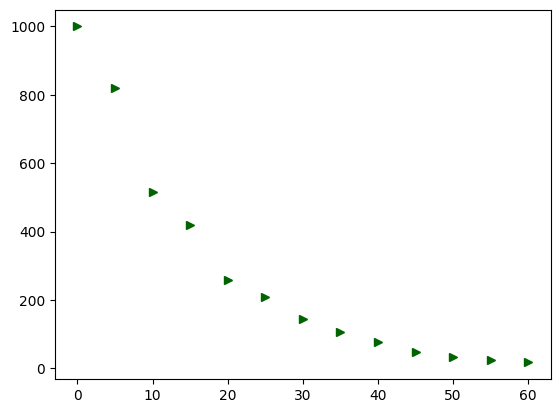

In [5]:
# Neutron experiment

### BEGIN SOLUTION
plt.plot(decay_t, decay_N, marker=">", color="darkgreen", linestyle="")
### END SOLUTION

* The plot of $f(x) = e^x$, with __square__ markers turned on, and both the markers and line are __red__.


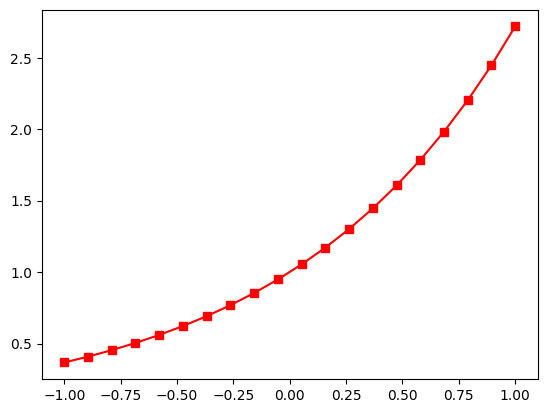

In [6]:
# Plotting e^x

### BEGIN SOLUTION
x = np.linspace(-1, 1, 20)
y = np.exp(x)
plt.plot(x, y, marker="s", color="r")
### END SOLUTION

* The plot of $x, x^2$ and $x^3$, with no markers, but the lines are __solid, dashed, and dotted__ respectively.

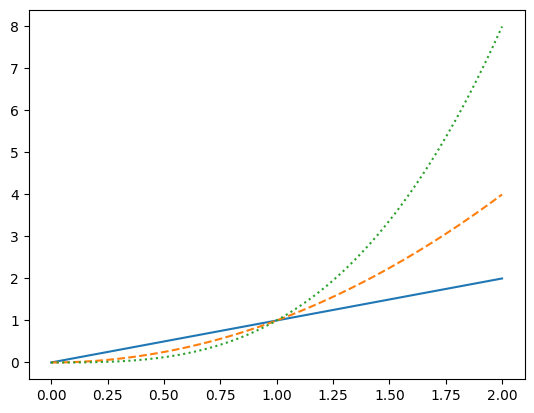

In [7]:
# Three polynomials

### BEGIN SOLUTION
x = np.linspace(0, 2, 100)
plt.plot(x, x)
plt.plot(x, x**2, linestyle="--")
plt.plot(x, x**3, linestyle=":")
### END SOLUTION

### Part C: labels and legends

As you can appreciate from your last plot, as soon as we start having multiple curves/data sets, it's harder to tell what's being shown!  A __legend__ (an additional set of labels on the plot showing which curve is which) can help.

The simplest way to create a legend with `pyplot` is with the `label` argument to `plt.plot()`.  Calling `label` appears to do nothing at first, but it is associating the label string you give to the data being plotted in that `plt.plot()` call.  Calling `plt.legend()` after all of the `plot` command then automatically draws a legend on the graph, showing the labels for each curve.

Take your final plot from part B (the three polynomial curves), __add a `label` in each `plt.plot()` command__, and then __call `plt.legend()` to draw a graph with a legend.__



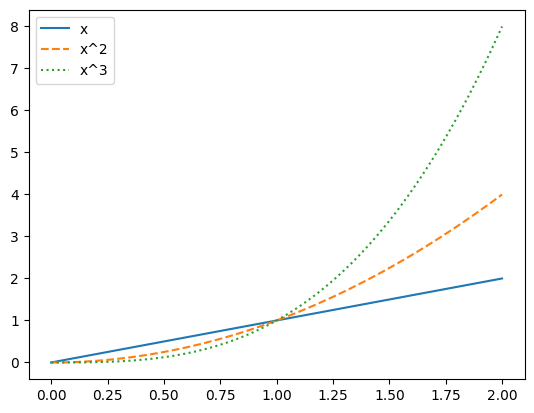

In [8]:
# Three polynomials

### BEGIN SOLUTION
x = np.linspace(0, 2, 100)
plt.plot(x, x, label="x")
plt.plot(x, x**2, linestyle="--", label="x^2")
plt.plot(x, x**3, linestyle=":", label="x^3")
plt.legend(loc="best")
### END SOLUTION

The legend command, like everything else in `matplotlib`, takes many options, but the most important one to know about is `loc='...'`, which accepts a string describing where you'd like the legend to appear.  The default option is `'best'`, which puts the legend at the program's best guess for a good spot.  __Try moving your legend around with the `loc=` argument.__  You can find a full list of options in the documentation, but start with `'upper right'`, `'lower left'`, and `'center'`.

### Part D: customizing with the state machine

Most of the options for `plt.plot()` focus on the points and lines we're plotting themselves.  However, there are lots of other features we might like to adjust for the plot as a whole, like adding labels or a title.  These are best made using the _state machine_ functions, which we call after `plt.plot()` to modify the state of the current plot.

Here are a few of the most important state-modifying functions in `pyplot`:

- `plt.xlabel()` and `plt.ylabel()` add labels to the axes.
- `plt.title()` adds a label to the whole plot.
- `plt.xlim()` and `plt.ylim()` change the _limits_ of the plot, i.e. min/max values of $x$ and $y$ which are shown.

There are, of course, [many others](https://matplotlib.org/api/pyplot_summary.html), but almost all of them are things that you'll use rarely, or only when tweaking a final plot for presentation.  Highlights of the others which I won't lead you through here include the `plt.xticks()`/`plt.yticks()` functions for control of tick marks and labels, and `plt.xscale()`/`plt.yscale()` functions which can be used for things like log-linear and log-log plotting.

On to the exercises!

- Return to the experimental data plot (__copy it from part B__), and __label the axes__.  The x-axis should read "t (min)", and the y-axis "Number of neutrons".

Text(0, 0.5, 'Number of neutrons')

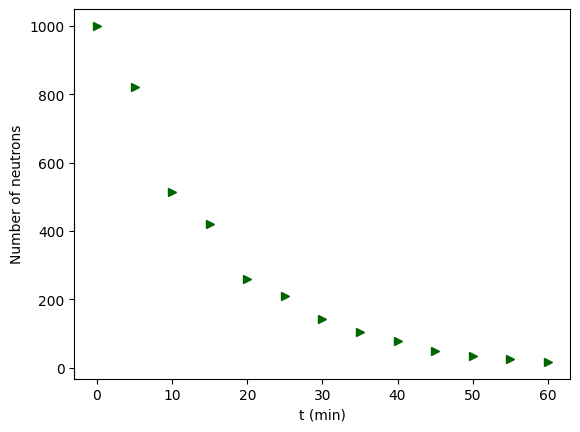

In [9]:
# Neutron experiment

### BEGIN SOLUTION
plt.plot(decay_t, decay_N, marker=">", color="darkgreen", linestyle="")
plt.xlabel("t (min)")
plt.ylabel("Number of neutrons")
### END SOLUTION

- Return to your plot of $f(x) = e^x$ (__copy it from part B__), and __add a title__ describing it.

Text(0.5, 1.0, 'This is what exp(x) looks like!')

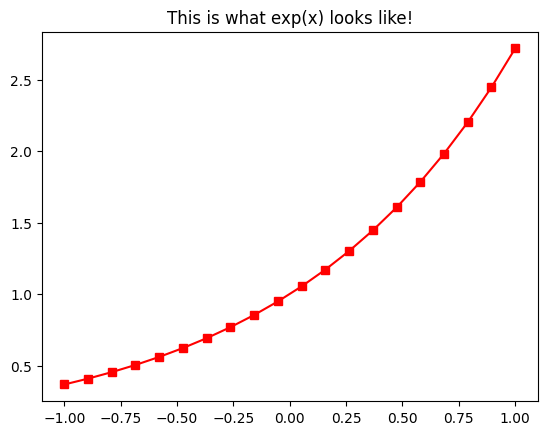

In [10]:
# Plotting e^x

### BEGIN SOLUTION
x = np.linspace(-1, 1, 20)
y = np.exp(x)
plt.plot(x, y, marker="s", color="r")
plt.title("This is what exp(x) looks like!")
### END SOLUTION

- Return to the three-polynomial plot (__copy it from part C__), but __change the plot limits__ so that $x$ runs from 0 to 1 instead.  (You'll probably want to change $y$ too, or your plot won't look very good!)

(0.0, 1.1)

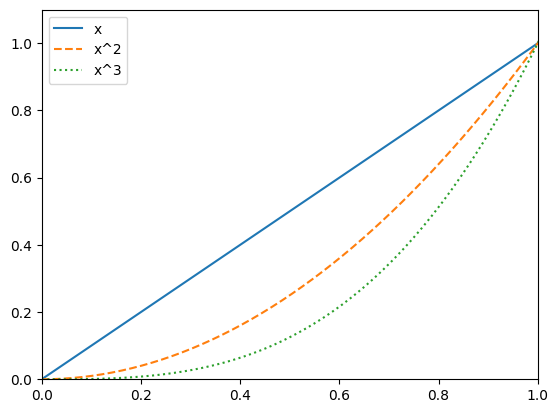

In [11]:
# Three polynomials

### BEGIN SOLUTION
x = np.linspace(0, 2, 100)
plt.plot(x, x, label="x")
plt.plot(x, x**2, linestyle="--", label="x^2")
plt.plot(x, x**3, linestyle=":", label="x^3")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1.1)
### END SOLUTION

## T7.2 - Thinking about sampling

Now that you know the basics, let's dig deeper into the idea of _sampling_ when we make plots.  As you have seen, when we call `plt.plot(x,y)`, both `x` and `y` have to be NumPy arrays - every plot is a _list plot_!  So we can't just say "plot f(x)", we have to make an array of the `x`-values we want to plot over, and then compute the array `f(x)`.  This can cause problems if we don't think hard enough about how to build `x`.

### Part A: plotting sin(x)

Let's start with a simple plot of `sin(x)` over the range from 0 to $2\pi$.  Here's a starting plot with some obvious sampling errors:

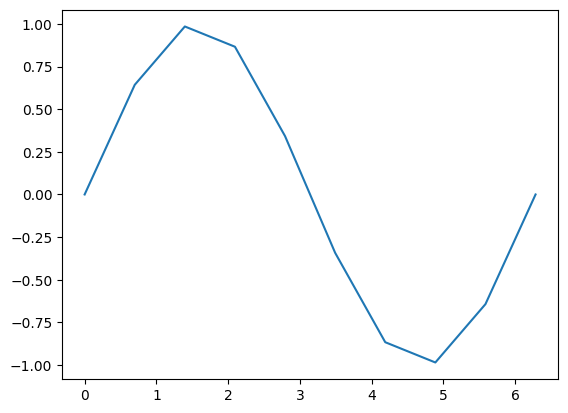

In [12]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)
plt.plot(x, y)

The blockiness that we see here can also be thought of as __discretization error__; our plot of $\sin(x)$ deviates from the real $\sin(x)$ because we're just drawing straight lines between a discrete set of points where we sample.  Increasing the number of samples decreases the error.  __Make a new plot in the cell below__ which doesn't have any visible sampling errors.

How well did you do?  __Try zooming in around $\pi/2$__: change the x-limit of the plot to $[1.5,1.7]$ and the y-limit to $[0.99,1.00]$. Did you pick enough points that the curve still looks smooth, or did the blockiness return?

(0.99, 1.0)

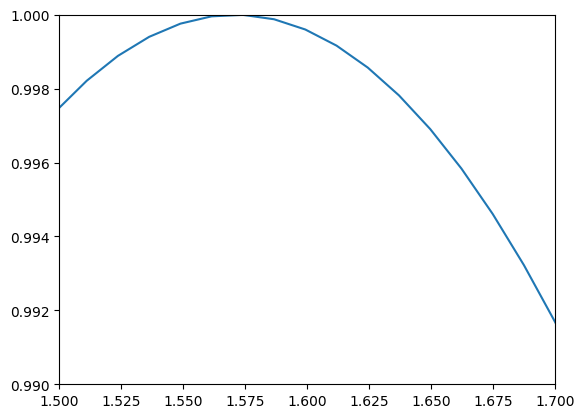

In [13]:
### BEGIN SOLUTION
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x)

plt.plot(x, y)
# Still blocky after zooming, unless we used around 500 points in x!
plt.xlim(1.5, 1.7)
plt.ylim(0.99, 1.00)
### END SOLUTION

Here's another plot with even worse sampling errors than my original: I've extended the x range out to $10\pi$, but I've increased to using only 20 points.  __How many points do you need in $x$ so that the curve looks smooth now?__  Can you predict how this is related to the number of points you needed to plot over $[0,2\pi]$?

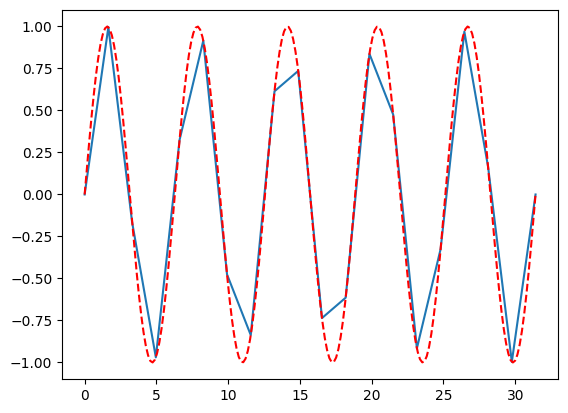

In [14]:
x = np.linspace(0, 10 * np.pi, 20)
plt.plot(x, np.sin(x))

### BEGIN SOLUTION
# It doesn't take too many - 100 points still has small errors,
# but 200 points looks smooth to me.

x2 = np.linspace(0, 10 * np.pi, 200)
plt.plot(x2, np.sin(x2), color="r", ls="--")
### END SOLUTION

### Part B: plotting sin(1/x)

Let's try a more challenging function: $\sin(1/x)$, which oscillates rapidly as we approach $x=0$.  __Plot this function over the range $[-0.01,0.01]$.__  Notice how the discretization errors qualitatively change from 10, to 100, to 1000 samples used.  __Can you spot the remaining discretization error that is present even with 10,000 samples?__

What happens if you try to use __11 samples__ instead of 10 to plot this function?

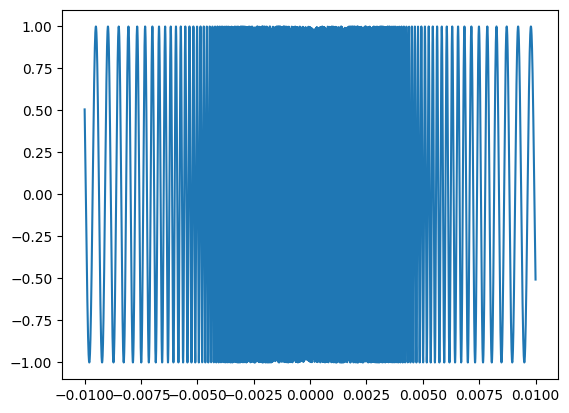

In [15]:
### BEGIN SOLUTION
x = np.linspace(-0.01, 0.01, 10000)
plt.plot(x, np.sin(1 / x))

# Even at 10k samples, you can see a little bit of "fuzz" at the top/bottom of the solid region near zero,
# where the function isn't quite making it up to the values -1 and +1.  100k samples will get rid of that last
# visible error, though.
#
# By the way, notice how fast you can calculate sin(x) 100k times and plot it!  Numpy is very fast, as we'll learn
# to appreciate more soon.

### END SOLUTION

The moral of the story is, __make sure you use enough samples to plot__, especially if you're looking at an unfamiliar function!  A good way to empirically test that you have enough samples to get rid of sampling error is to just _double the number of samples, and see if the plot changes visibly_ - if not, then your sampling error has (probably!) become too small to see.

### Part C (optional challenge!): plotting the step function

Numerical plots don't play nicely with sudden changes in functions, and they don't come much more sudden than the __step function__, also called the __Heaviside function__, which is defined as

$$
H(x) = \begin{cases} 1, x \geq 0;\\
0, x < 0. \end{cases}
$$

(The value of $H(0)$ is sort of ambiguous, so you may see other definitions, but the value of $H(0)$ also isn't terribly important for most applications of this.)

NumPy comes with an implementation of this function, `numpy.heaviside(x,1)`.  (The second argument `1` defines $H(0)$, matching our equation above.)

In the cell below, __plot the Heaviside function over the range [-1,1]__.  You can, as always, eliminate the discretization effects around 0 by just throwing lots of points at it, although this seems sort of wasteful here because all the points are 0 and 1!

For a real challenge, _can you make a plot with no discretization errors and using only 4 samples?_



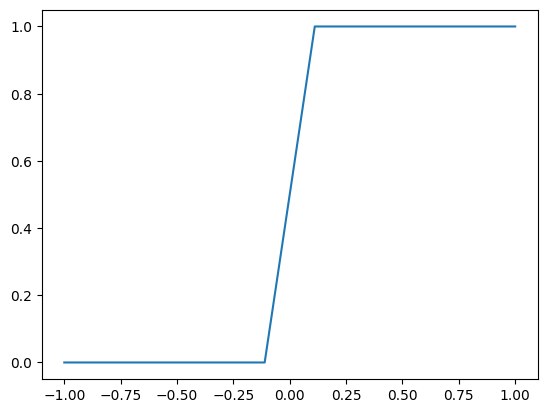

In [16]:
x = np.linspace(-1, 1, 10)
plt.plot(x, np.heaviside(x, 1))

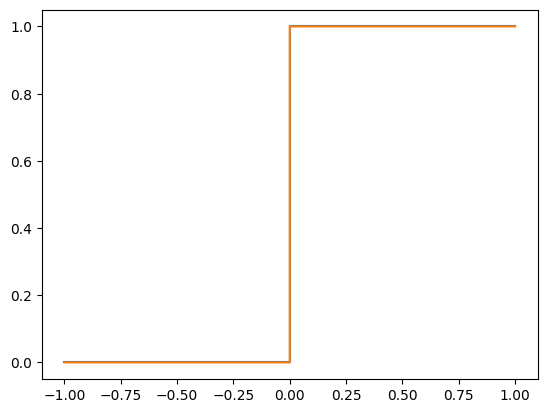

In [17]:
### BEGIN SOLUTION
# To make this plot look good with only a handful of points, we need to make sure both (0,0) and (0,1) are included,
# so we get a vertical line at zero.

# This is actually easiest to do by hand!  The four points we want to join with straight lines are:
#   (-1,0) --> (0,0) --> (0,1) --> (1,1)

x = np.array([-1, 0, 0, 1])
y = np.array([0, 0, 1, 1])

plt.plot(x, y)

# In case this feels like cheating, we can actually do the same using np.heaviside; the simplest way
# is just to put two x points really, really close to zero, but on either side.

x = np.array([-1, -1e-6, 1e-6, 1])
plt.plot(x, np.heaviside(x, 1))

### END SOLUTION